# Redes Neurais com PyTorch

PyTorch é uma biblioteca poderosa para construir e treinar redes neurais, amplamente usada em pesquisa e desenvolvimento de modelos de aprendizado profundo. Ele oferece ferramentas para manipulação eficiente de **tensores** — a estrutura de dados essencial para representar e processar informações em redes neurais — e integra suporte para cálculos automáticos de gradientes, fundamentais para o aprendizado dos parâmetros do modelo.

## O que são Tensores?

Tensores são estruturas de dados generalizadas que podem representar escalars, vetores, matrizes e dados de maior dimensionalidade. Em redes neurais, eles são usados para armazenar e operar sobre entradas, saídas, pesos e gradientes. Por exemplo:

- **Escalar** (tensor de ordem 0): Representa um único número.
- **Vetor** (tensor de ordem 1): Sequência de números, como uma lista.
- **Matriz** (tensor de ordem 2): Tabela bidimensional de números.
- **Tensor de ordem superior**: Estrutura com mais de duas dimensões, como imagens em RGB (com dimensões de altura, largura e canais de cor).

Os tensores em PyTorch permitem cálculos eficientes e paralelos em GPUs, acelerando o treinamento de modelos complexos. Com eles, é possível realizar operações matemáticas como multiplicação de matrizes, somas e transformações que são fundamentais para as operações internas das redes neurais.

Com PyTorch, é possível implementar redes neurais de diferentes arquiteturas de forma flexível e intuitiva, facilitando a criação de modelos personalizados. A biblioteca também inclui uma vasta coleção de funções de ativação, otimização e loss, além de camadas comuns para redes convolucionais, recorrentes e totalmente conectadas. PyTorch simplifica tanto a construção de modelos quanto o treinamento em GPUs, acelerando o desenvolvimento de soluções de inteligência artificial.

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Transformação para normalizar os dados
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Carregando os dados de treinamento e teste
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)

# DataLoaders para iteração em batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 48.9MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.00MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.24MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



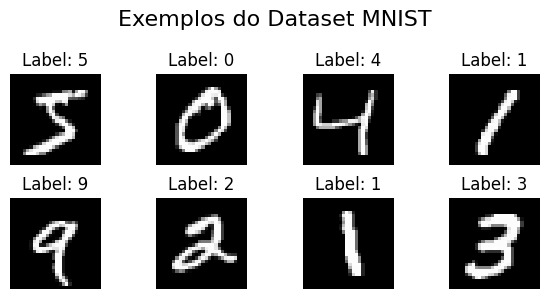

In [3]:
# Função para mostrar um grid de imagens
def show_mnist_examples(dataset, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3))
    fig.suptitle("Exemplos do Dataset MNIST", fontsize=16)

    for i in range(num_rows * num_cols):
        img, label = dataset[i]
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Label: {label}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Exibindo um grid de 4x4 imagens
show_mnist_examples(train_dataset, num_rows=2, num_cols=4)

A equação total da rede neural com duas camadas é:

$$
\text{output} = \text{softmax}((\text{ReLU}(X W_1 + b_1)) W_2 + b_2)
$$

onde:

- **$ X $**: Entrada da rede com dimensão $ N \times 784 $ (para $ N $ amostras).
- **$ W_1 $** e **$ b_1 $**: Pesos e bias da primeira camada.
- **$ W_2 $** e **$ b_2 $**: Pesos e bias da segunda camada.
- **ReLU**: Função de ativação na camada oculta.
- **softmax**: Função de ativação na camada de saída para normalizar as saídas em probabilidades.

In [4]:
torch.manual_seed(42)

# Parâmetros da camada 1
W1 = torch.randn(784, 128, requires_grad=True)
b1 = torch.zeros(128, requires_grad=True)

# Parâmetros da camada 2
W2 = torch.randn(128, 10, requires_grad=True)
b2 = torch.zeros(10, requires_grad=True)

In [5]:
def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

def model_1(x):
    x = x.view(-1, 28*28)  # Achata a imagem em um vetor de 784 elementos
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return z2

In [6]:
x, y = next(iter(train_loader))

print(x.shape, y.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [7]:
x = x.view(-1, 28*28)
z1 = x @ W1 + b1
z1.shape

torch.Size([64, 128])

A equação da perda de entropia cruzada com softmax para $ N $ amostras é:

$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^N \log(p_{\text{true}}^{(i)})
$$
onde:
- **$ \text{Loss} $**: Média da perda para todas as amostras, representando a entropia cruzada média entre as previsões e os rótulos verdadeiros.
- **$ N $**: Número total de amostras.
- **$ p_{\text{true}}^{(i)} $**: Probabilidade prevista para a classe correta da $ i $-ésima amostra, obtida pelo softmax.
- **$ \log(p_{\text{true}}^{(i)}) $**: Logaritmo da probabilidade da classe correta, penalizando previsões incorretas mais fortemente quanto menor for a probabilidade da classe correta.


In [8]:
def softmax_cross_entropy(logits, labels):
    logits_exp = torch.exp(logits - torch.max(logits, dim=1, keepdim=True).values)
    softmax = logits_exp / torch.sum(logits_exp, dim=1, keepdim=True)
    log_softmax = torch.log(torch.clamp(softmax, min=1e-9))
    correct_log_probs = log_softmax.gather(1, labels.unsqueeze(1)).squeeze(1)
    loss = -torch.mean(correct_log_probs)
    return loss

In [9]:
from tqdm import tqdm

def train_model(train_loader, train_dataset, model, optimizer, loss_fn, num_epochs=5):
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        for data, target in tqdm(train_loader):
            logits = model(data)
            loss = loss_fn(logits, target)
            total_loss += loss.item()

            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == target).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / len(train_dataset)
        print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

In [10]:
optimizer = torch.optim.SGD([W1, b1, W2, b2], lr=0.1)
train_model(train_loader, train_dataset, model_1, optimizer, softmax_cross_entropy, num_epochs=5)

100%|██████████| 938/938 [00:20<00:00, 46.36it/s]


Epoch 1, Loss: 7.4963, Accuracy: 0.6320


100%|██████████| 938/938 [00:19<00:00, 48.51it/s]


Epoch 2, Loss: 5.4004, Accuracy: 0.7360


100%|██████████| 938/938 [00:19<00:00, 49.25it/s]


Epoch 3, Loss: 5.1930, Accuracy: 0.7471


100%|██████████| 938/938 [00:19<00:00, 48.95it/s]


Epoch 4, Loss: 5.0328, Accuracy: 0.7551


100%|██████████| 938/938 [00:19<00:00, 47.40it/s]

Epoch 5, Loss: 4.9187, Accuracy: 0.7606


# Introdução ao `torch.nn`

O módulo `torch.nn` fornece classes e funções úteis para a construção de redes neurais no PyTorch. Ele oferece camadas predefinidas, funções de ativação, funções de perda e muito mais, facilitando o desenvolvimento de modelos complexos.

In [11]:
import torch.nn as nn

## `nn.Linear`

Para entender como `torch.nn` pode simplificar a construção de redes neurais, vamos começar com `nn.Linear`, uma camada que aplica uma transformação linear. A camada `nn.Linear` é definida como:

$$
\text{output} = \text{input} \times \text{weight}^T + \text{bias}
$$

In [12]:
# Exemplo de uso da camada Linear
linear_layer = nn.Linear(in_features=4, out_features=3)
input_tensor = torch.randn(1, 4)  # Batch de tamanho 1 com 4 features
output_tensor = linear_layer(input_tensor)

print("Input:", input_tensor)
print("Output:", output_tensor)
print("Pesos:", linear_layer.weight)
print("Bias:", linear_layer.bias)

Input: tensor([[ 0.4721,  0.2868, -0.6785, -0.6447]])
Output: tensor([[-0.6523,  0.6599,  0.2952]], grad_fn=<AddmmBackward0>)
Pesos: Parameter containing:
tensor([[-0.2768, -0.3899, -0.3406,  0.2611],
        [-0.0671,  0.0840, -0.4337,  0.0471],
        [-0.2366,  0.4074, -0.4882, -0.2709]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.4726,  0.4035, -0.2158], requires_grad=True)


# Construindo Modelos com `nn.Sequential`

O `nn.Sequential` é uma maneira prática e concisa de construir redes neurais no PyTorch. Ele permite empilhar camadas e operações em sequência, o que é ideal para redes em que cada camada é aplicada uma após a outra, sem operações intermediárias complexas.

In [13]:
simple_model = nn.Sequential(
    nn.Linear(4, 3),  # Camada Linear de 4 entradas para 3 saídas
    nn.ReLU(),        # Função de ativação ReLU
    nn.Linear(3, 2)   # Camada Linear de 3 entradas para 2 saídas
)

# Exemplo de uso
input_tensor = torch.randn(1, 4)  # Batch de tamanho 1 com 4 features
output_tensor = simple_model(input_tensor)

print("Input:", input_tensor)
print("Output:", output_tensor)

Input: tensor([[ 0.3367, -1.1663, -2.2917, -2.0169]])
Output: tensor([[-0.1091, -0.0794]], grad_fn=<AddmmBackward0>)


In [14]:
model_2 = nn.Sequential(
    nn.Flatten(),         # Transforma a imagem em um vetor de 784 elementos
    nn.Linear(784, 128),  # Camada Linear de entrada
    nn.ReLU(),            # Função de ativação
    nn.Linear(128, 10)    # Camada Linear de saída
)

In [15]:
model_2

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
loss_fn = nn.CrossEntropyLoss()  # Entropia cruzada para problemas de classificação
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [17]:
train_model(train_loader, train_dataset, model_2, optimizer, loss_fn, num_epochs=5)

100%|██████████| 938/938 [00:18<00:00, 50.71it/s]


Epoch 1, Loss: 0.2633, Accuracy: 0.9233


100%|██████████| 938/938 [00:18<00:00, 50.90it/s]


Epoch 2, Loss: 0.1141, Accuracy: 0.9660


100%|██████████| 938/938 [00:17<00:00, 53.35it/s]


Epoch 3, Loss: 0.0798, Accuracy: 0.9758


100%|██████████| 938/938 [00:19<00:00, 49.16it/s]


Epoch 4, Loss: 0.0601, Accuracy: 0.9826


100%|██████████| 938/938 [00:17<00:00, 53.48it/s]

Epoch 5, Loss: 0.0475, Accuracy: 0.9862


# Construindo Modelos com `nn.Module`

Embora `nn.Sequential` seja útil para redes simples onde as camadas são aplicadas em sequência, ele é limitado quando precisamos de mais flexibilidade. Para casos mais complexos, onde podemos querer camadas adicionais, diferentes caminhos de cálculo ou operações customizadas, o PyTorch oferece a classe `nn.Module`.

Ao criar um modelo com `nn.Module`, temos controle total sobre a arquitetura e o fluxo de dados, pois definimos as camadas e o método `forward` explicitamente.

## Estrutura Básica de um `nn.Module`

Para construir um modelo com `nn.Module`, criamos uma classe que herda de `nn.Module` e define as camadas e o fluxo dos dados. A estrutura básica é:

1. No método `__init__`, definimos as camadas.
2. No método `forward`, definimos o fluxo de dados.

In [18]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Definindo as camadas
        self.fc1 = nn.Linear(784, 128)  # Camada totalmente conectada de entrada
        self.relu = nn.ReLU()           # Função de ativação ReLU
        self.fc2 = nn.Linear(128, 10)   # Camada totalmente conectada de saída

        # Initialize
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)

    def forward(self, x):
        # Definindo o fluxo de dados
        x = x.view(-1, 28*28)  # Achata a imagem para um vetor de 784 elementos
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [19]:
model_3 = SimpleNN()

In [20]:
pred = model_3(x)

In [21]:
loss_fn = nn.CrossEntropyLoss()  # Entropia cruzada para problemas de classificação
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [22]:
train_model(train_loader, train_dataset, model_3, optimizer, loss_fn, num_epochs=5)

100%|██████████| 938/938 [00:18<00:00, 49.62it/s]


Epoch 1, Loss: 0.2634, Accuracy: 0.9201


100%|██████████| 938/938 [00:17<00:00, 52.48it/s]


Epoch 2, Loss: 0.1168, Accuracy: 0.9648


100%|██████████| 938/938 [00:17<00:00, 52.22it/s]


Epoch 3, Loss: 0.0837, Accuracy: 0.9746


100%|██████████| 938/938 [00:18<00:00, 50.70it/s]


Epoch 4, Loss: 0.0632, Accuracy: 0.9807


100%|██████████| 938/938 [00:22<00:00, 41.97it/s]

Epoch 5, Loss: 0.0502, Accuracy: 0.9846


In [23]:
x, y = test_dataset[0]
x.shape, y

(torch.Size([1, 28, 28]), 7)

In [24]:
pred = model_3(x.unsqueeze(0))
y_pred = pred.argmax()

print(y_pred)
print(torch.softmax(pred, dim=1))

tensor(7)
tensor([[3.1795e-08, 2.7045e-08, 2.8161e-06, 3.2167e-05, 3.4325e-10, 6.0988e-08,
         2.3737e-13, 9.9996e-01, 3.8035e-08, 4.3799e-06]],
       grad_fn=<SoftmaxBackward0>)


## Exercícios
Agora é sua vez!

### Exercício 1

Em um dado problema, você deverá implementar um modelo que receba como entrada imagens de dimensões 16x16, possua 2 camadas ocultas e terá como saída 5 classes. Implemente a classe referente ao modelo (utilize `nn.Module`) e teste com tensores aleatórios.

In [29]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    # Definindo as camadas
    self.fc1 = nn.Linear(16*16, 128)  # Camada totalmente conectada de entrada
    self.relu = nn.ReLU()           # Função de ativação ReLU
    self.fc2 = nn.Linear(128, 128)   # Camada intermediária
    self.relu = nn.ReLU()           # Função de ativação ReLU
    self.fc3 = nn.Linear(128, 5)   # Camada totalmente conectada de saída

  def forward(self, x):
    # Definindo o fluxo de dados
    x = x.view(-1, 16*16)  # Achata a imagem
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x

model = Modelo()
random_tensor = torch.randn(1, 16, 16)
output = model(random_tensor)
output

tensor([[-0.0839, -0.0984, -0.0976, -0.1395,  0.1965]],
       grad_fn=<AddmmBackward0>)

### Exercício 2

Agora, considere o mesmo problema do exercício anterior mas considere que as imagens são RGB. Compare o número de parâmetros deste modelo com o anterior.

In [36]:
class ModeloRGB(nn.Module):
  def __init__(self):
    super(ModeloRGB, self).__init__()
    # Definindo as camadas
    self.fc1 = nn.Linear(16*16*3, 128)  # Camada totalmente conectada de entrada
    self.relu = nn.ReLU()           # Função de ativação ReLU
    self.fc2 = nn.Linear(128, 128)   # Camada intermediária
    self.relu = nn.ReLU()           # Função de ativação ReLU
    self.fc3 = nn.Linear(128, 5)   # Camada totalmente conectada de saída

  def forward(self, x):
    # Definindo o fluxo de dados
    x = x.view(-1, 16*16*3)  # Achata a imagem
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x

model = ModeloRGB()
random_tensor = torch.randn(1, 3, 16, 16)
output = model(random_tensor)
output

tensor([[ 0.0617, -0.1777,  0.0681,  0.0998, -0.2209]],
       grad_fn=<AddmmBackward0>)

In [37]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

115589

In [38]:
print(count_parameters(Modelo()))
print(count_parameters(ModeloRGB()))

50053
115589
